Gerekli python kütüphanelerinin yüklenmesi


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom # Veri Artırımı Katmanları

Google Drive Bağlantısı

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/dataset'

Veri Ön İşleme
Veri Yükleme ve Ayırma (Rescaling ve Splitting)
 128x128 piksel boyutu edildi. Aynı zamanda piksel değerlerini 0-1 arasına normalize edildi. (rescale=1./255).

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("\nSınıf İsimleri:", class_names)
NUM_CLASSES = len(class_names)
print("Sınıf Sayısı:", NUM_CLASSES)

Found 107 files belonging to 2 classes.
Using 86 files for training.
Found 107 files belonging to 2 classes.
Using 21 files for validation.

Sınıf İsimleri: ['Hiq Protein Tozu', 'Protein Ocean Creatin']
Sınıf Sayısı: 2


Normalizasyon Katmanı ekleme


In [5]:

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [6]:
# HÜCRE B.1'de YAPILACAK DÜZELTME

# 1. Online Veri Artırımı (Data Augmentation)
data_augmentation = Sequential([
  RandomFlip("horizontal"),
  RandomRotation(0.15),
  RandomZoom(0.1),
])

# 2. Geliştirilmiş CNN Modeli Mimarisi (Model 3.1)
model_3_1 = Sequential([
    # Veri Artırımı MODELİN EN BAŞINA eklenir (Input shape'i buradan alır)
    data_augmentation,

    # Silinecek Satır: tf.keras.Input(shape=IMG_SIZE + (3,)),

    # 1. Konvolüsyon Katmanı (Filtre Sayısı 32 -> 64 oldu)
    # İlk Conv2D katmanına input_shape eklenmeli
    Conv2D(64, (3, 3), activation='relu', input_shape=IMG_SIZE + (3,)),
    MaxPooling2D((2, 2)),

    # 2. Konvolüsyon Katmanı (Filtre Sayısı 64 -> 128 )
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # 3. Konvolüsyon Katmanı (Filtre Sayısı 128 -> 256 )
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

print("--- Model 3.1 Özeti ---")
model_3_1.summary()

--- Model 3.1 Özeti ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
#
# tf.keras.optimizers.Adam() varsayılan LR: 0.001'dir. Biz daha dikkatli öğrenmesi için düşürdük.
model_3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Model Eğitimi
EPOCHS = 50

# Dikkat: train_ds BATCH_SIZE=64 ile yüklendi (A.2'de yapmıştık)
history_3_1 = model_3_1.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds
)

print("\nModel 3.1 Eğitimi Tamamlandı!")

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.6092 - loss: 0.8789 - val_accuracy: 0.8095 - val_loss: 0.6125
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5369 - loss: 0.6469 - val_accuracy: 0.3333 - val_loss: 0.7984
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5876 - loss: 0.6453 - val_accuracy: 0.4286 - val_loss: 0.7424
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6127 - loss: 0.6427 - val_accuracy: 0.6667 - val_loss: 0.6454
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7452 - loss: 0.5846 - val_accuracy: 0.6667 - val_loss: 0.6112
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7374 - loss: 0.5420 - val_accuracy: 0.8571 - val_loss: 0.3901
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6498 - loss: 0.5824 - val_accuracy: 0.8095 - val_loss: 0.4180
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6632 - loss: 0.5599 - val_accuracy: 0.6667 - val_loss: 0.6689
Epoch 9/

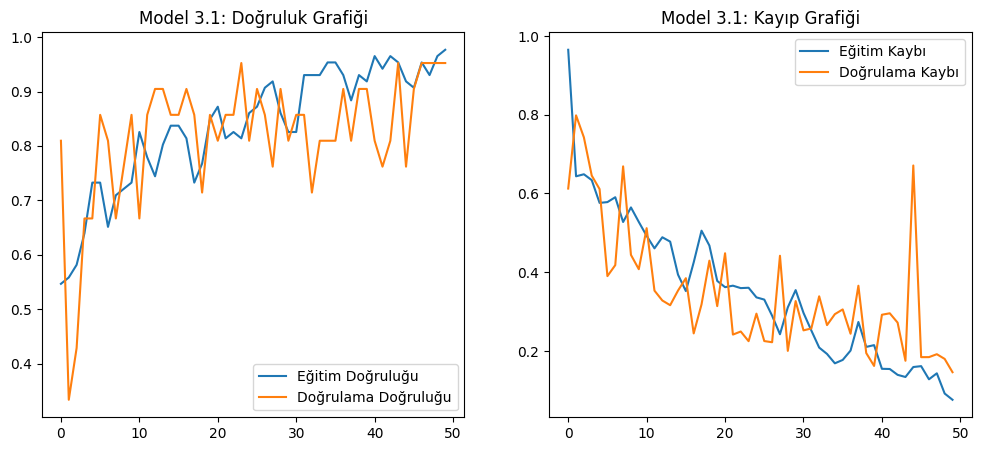

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9524 - loss: 0.1461

Model 3.1 Test Seti Doğruluğu: 95.24%


In [8]:
# Grafik Çizimi
acc = history_3_1.history['accuracy']
val_acc = history_3_1.history['val_accuracy']
loss = history_3_1.history['loss']
val_loss = history_3_1.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Eğitim Doğruluğu')
plt.plot(val_acc, label='Doğrulama Doğruluğu')
plt.title('Model 3.1: Doğruluk Grafiği')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.title('Model 3.1: Kayıp Grafiği')
plt.legend()
plt.show()

# Test Seti Doğruluğunu Raporlama
loss, accuracy_3_1 = model_3_1.evaluate(val_ds)

print(f"\nModel 3.1 Test Seti Doğruluğu: {accuracy_3_1*100:.2f}%")

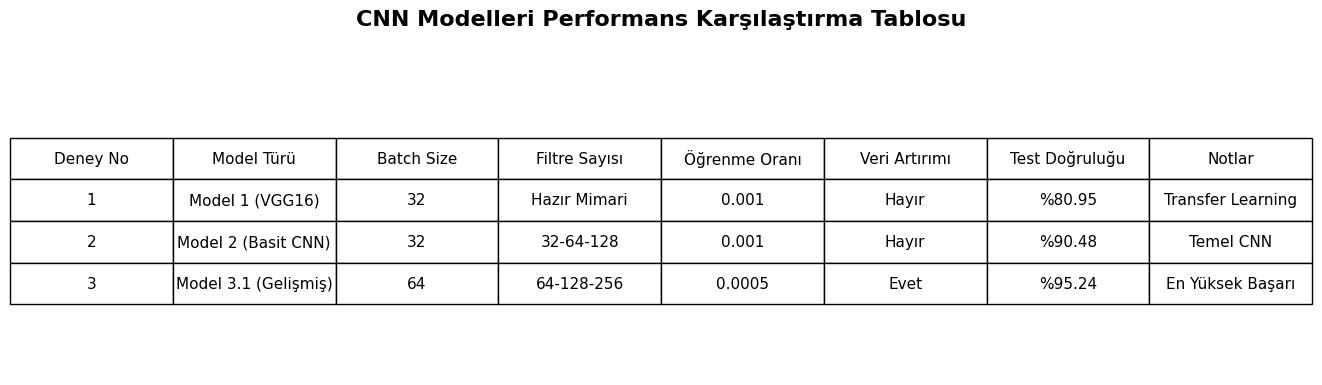

In [10]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Deney No': [1, 2, 3],
    'Model Türü': ['Model 1 (VGG16)', 'Model 2 (Basit CNN)', 'Model 3.1 (Gelişmiş)'],
    'Batch Size': [32, 32, 64],
    'Filtre Sayısı': ['Hazır Mimari', '32-64-128', '64-128-256'],
    'Öğrenme Oranı': [0.001, 0.001, 0.0005],
    'Veri Artırımı': ['Hayır', 'Hayır', 'Evet'],
    'Test Doğruluğu': ['%80.95', '%90.48', '%95.24'],
    'Notlar': ['Transfer Learning', 'Temel CNN', 'En Yüksek Başarı']
}

df = pd.DataFrame(data)

# Görsel Tablo Oluşturma
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Stil Ayarları
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2.5)

# Başlık ekle
plt.title("CNN Modelleri Performans Karşılaştırma Tablosu", fontsize=16, pad=30, fontweight='bold')

# Resmi kaydet (GitHub README için kullanabilirsin)
plt.savefig("tum_modeller_tablo.png", bbox_inches='tight', dpi=300)
plt.show()